In [2]:
%conda install pandas

Solving environment: - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /Users/goguma/miniforge3/envs/bert-gpu

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandas-1.3.4               |   py39h7f752ed_1        11.5 MB  conda-forge
    pytz-2021.3                |     pyhd8ed1ab_0         242 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        11.8 MB

The following NEW packages will be INSTALLED:

  pandas             conda-forge/osx-arm64::pandas-1.3.4-py39h7f752ed_1
  pytz               conda-forge/noarch::pytz-2021.3-pyhd8ed1ab_0



pandas-1.3.4         | 11.5 MB   | ##################################### | 100% 
pytz-2021.3          | 242 KB    | ##################################### | 100% 
Preparing transactio

In [31]:
%conda install scikit-learn

Solving environment: / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /Users/goguma/miniforge3/envs/bert-gpu

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-1.1.0               |     pyhd8ed1ab_0         210 KB  conda-forge
    scikit-learn-1.0.1         |   py39hef7049f_2         7.0 MB  conda-forge
    threadpoolctl-3.0.0        |     pyh8a188c0_0          17 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         7.2 MB

The following NEW packages will be INSTALLED:

  joblib             conda-forge/noarch::joblib-1.1.0-pyhd8ed1ab_0
  scikit-learn       conda-forge/osx-arm64::scikit-learn-1.0.1-py39hef7049f_2
  threadpoolctl      conda-forge/noarch::threadpoolctl-3.0.0-pyh8a188c0_0



threadpoolctl

In [34]:
%conda install seaborn

Solving environment: - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /Users/goguma/miniforge3/envs/bert-gpu

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    patsy-0.5.2                |     pyhd8ed1ab_0         188 KB  conda-forge
    seaborn-0.11.2             |       hd8ed1ab_0           4 KB  conda-forge
    seaborn-base-0.11.2        |     pyhd8ed1ab_0         223 KB  conda-forge
    statsmodels-0.13.1         |   py39h20ef057_0        10.6 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        11.0 MB

The following NEW packages will be INSTALLED:

  patsy              conda-forge/noarch::patsy-0.5.2-pyhd8ed1ab_0
  seaborn            conda-forge/noarch::seaborn-0.11.2-hd8ed1ab_0
  seaborn-base       conda-forge/

In [252]:
import pandas as pd
import numpy as np

Dataset 불러오기 </br>
- dataset : Game Bot Detection
- Hacking and Countermeasure Research Lab</li>
- https://ocslab.hksecurity.net/Datasets/game-bot-detection</li>


In [3]:
data_path = "./dataset/"
player_act = pd.read_csv(data_path + "(after) Player actions features.csv")
group_act = pd.read_csv(data_path + "(after) Group activities features.csv")

In [44]:
# Actor와 A_cc(Actor_Account)는 numeric 변수가 아니므로 삭제.
player_act = player_act.drop("Actor", axis=1)
player_act = player_act.drop("A_Acc", axis=1)

print(player_act[:5])
print(player_act.columns)

   collect_max_count  Sit_ratio  Sit_count  sit_count_per_day  Exp_get_ratio  \
0                  6     1.0430       1012            24.0952        15.5210   
1                  0     3.5570        141             8.8125        13.6226   
2                  3     4.9882        190            47.5000        15.6734   
3                  0     0.8581         30             3.3333        17.8776   
4                  4     4.2667        215            19.5455        18.0194   

   Exp_get_count  exp_get_count_per_day  Item_get_ratio  Item_get_count  \
0          15060               358.5714          6.2847            6098   
1            540                33.7500          6.9122             274   
2            597               149.2500         13.5994             518   
3            625                69.4444          6.8650             240   
4            908                82.5455          8.0572             406   

   item_get_count_per_day  ...  Use_portal_count_per_day  Killed_byp

In [45]:
group_act = group_act.drop("Actor", axis=1)
group_act = group_act.drop("A_Acc", axis=1)
print(group_act[:5])
print(group_act.columns)

   Avg_PartyTime  GuildAct_count  GuildJoin_count   Type
0      6760.2061               1                0  Human
1      4792.6923               2                0  Human
2      5341.3333               0                0  Human
3      4584.7143               0                0  Human
4      6350.5000               0                0  Human
Index(['Avg_PartyTime', 'GuildAct_count', 'GuildJoin_count', 'Type'], dtype='object')


Pearson Correlation (피어쓴 상관계수) Heatmap
- Human과 Bot 각각에서 feature의 상관관계가 어떻게 나타나는지 확인.
- Human의 상관계수들과 Bot의 상관계수들의 차를 구한 후 0.5 이상의 차이를 보인 feature만 선택
- 선택된 feature들을 재구성하여 새로운 final_dataset 생성

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# player_act heatmap
plt.figure(figsize=(31,31))
player_cor = player_act.corr()
sns.heatmap(player_cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.savefig('./player_act_heatmap.jpg')

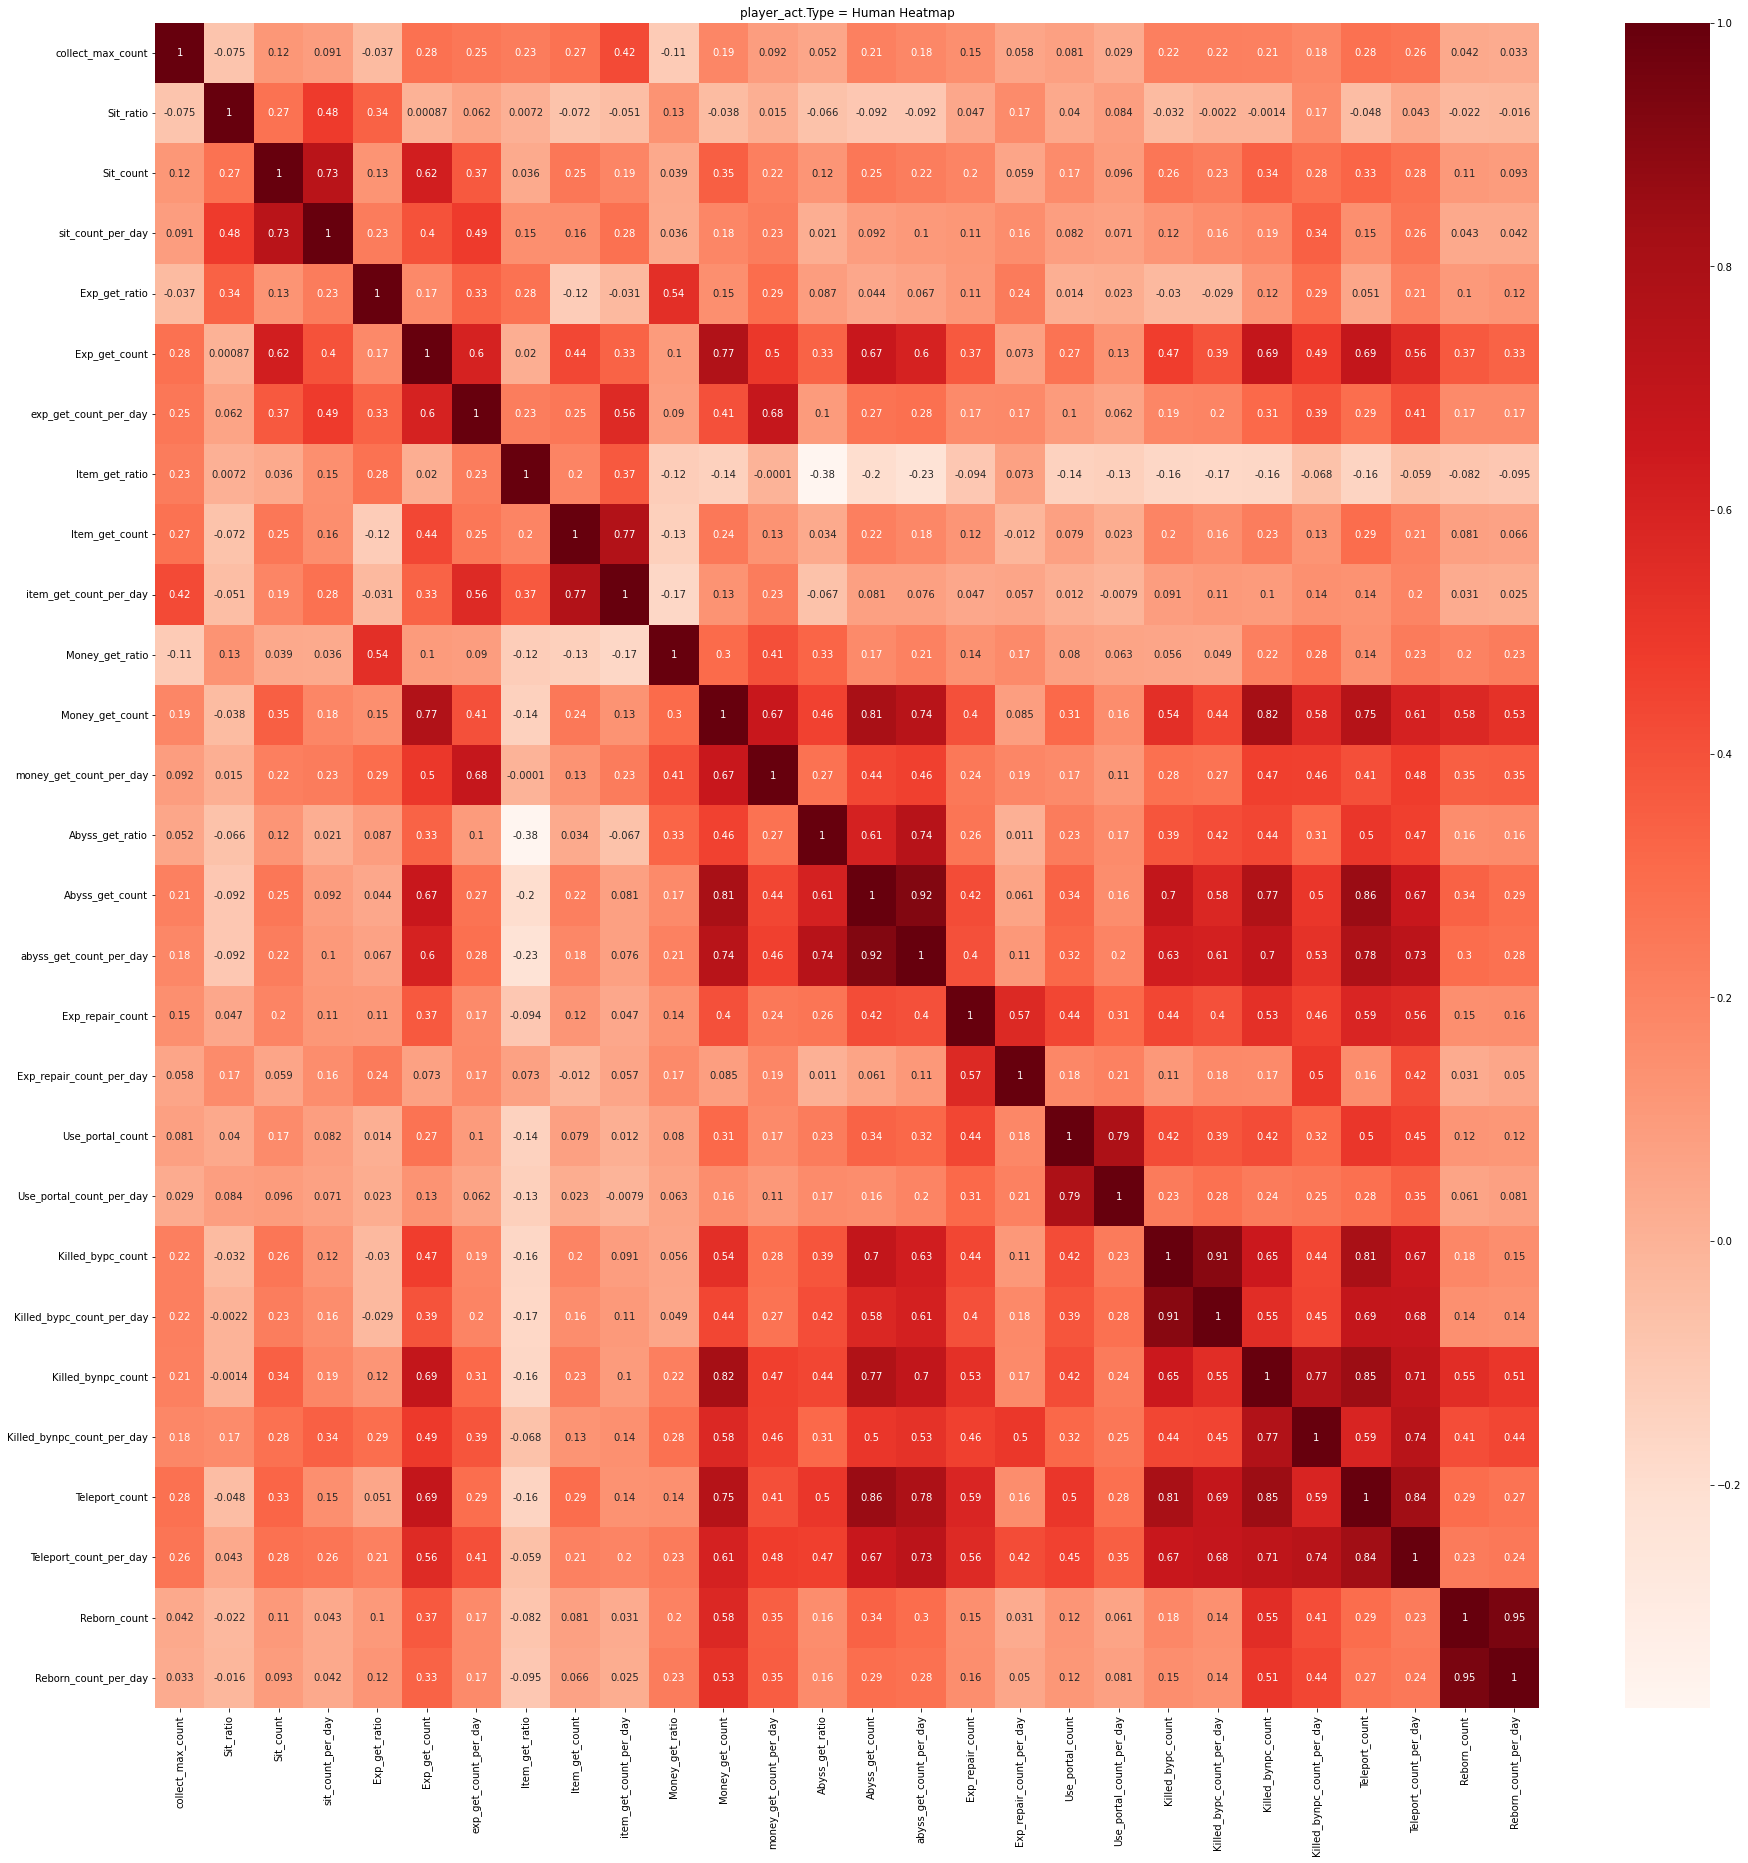

In [189]:
# dataframe 분리 (human, bot)
# player act type human heatmap
plt.figure(figsize=(31,31))
plt.title("player_act.Type = Human Heatmap")
condition = (player_act.Type == 'Human')
player_h_cor = player_act[condition].corr()
sns.heatmap(player_h_cor, annot=True, cmap=plt.cm.Reds)
#player_act[~condition]
plt.show()

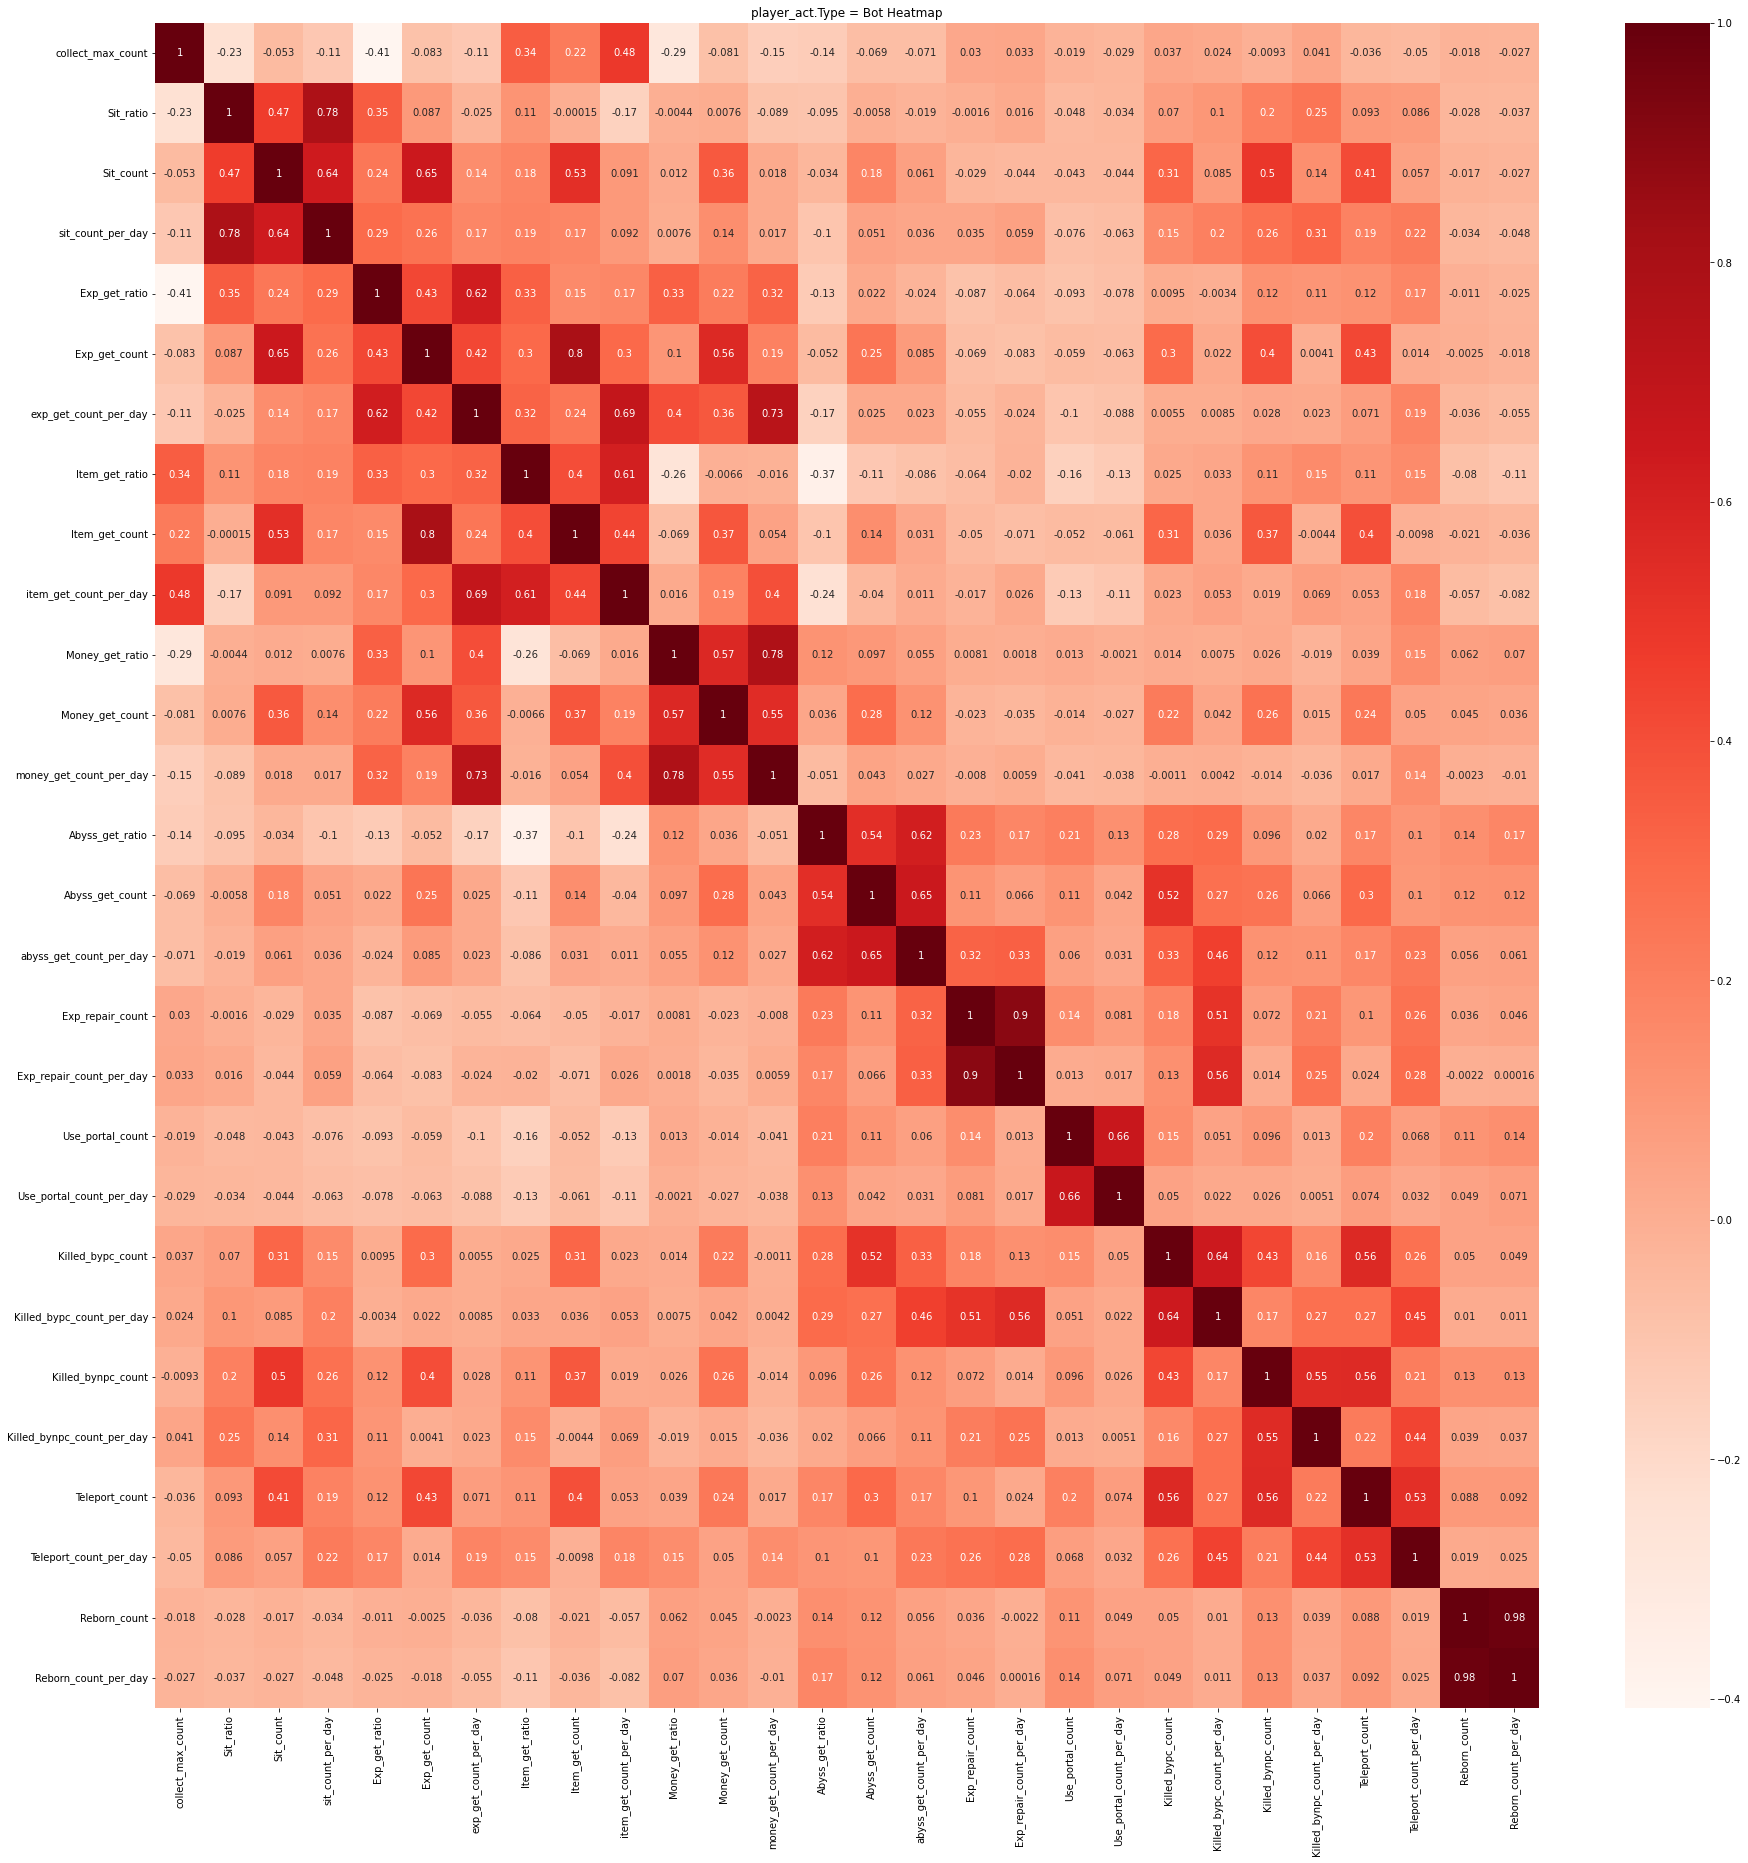

In [190]:
# player act type bot heatmap
plt.figure(figsize=(31,31))
plt.title("player_act.Type = Bot Heatmap")
condition = (player_act.Type == 'Bot')
player_b_cor = player_act[condition].corr()
sns.heatmap(player_b_cor, annot=True, cmap=plt.cm.Reds)
plt.show()

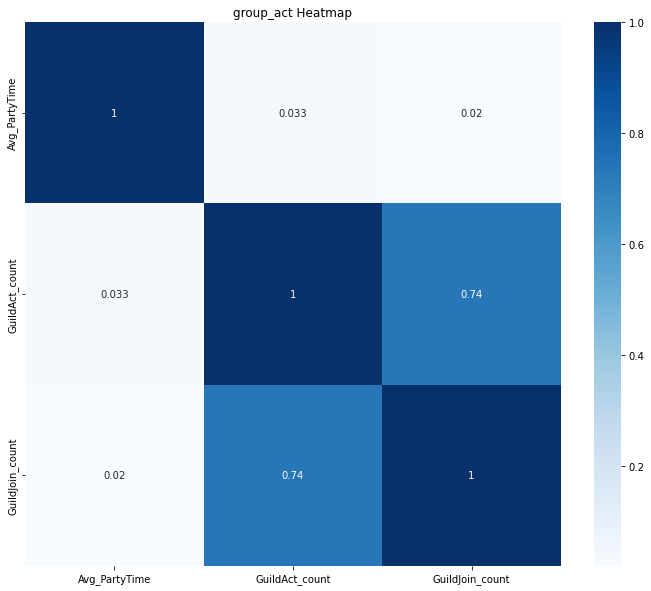

In [50]:
# group_act heatmap
plt.figure(figsize=(12,10))
plt.title("group_act Heatmap")
group_cor = group_act.corr()
sns.heatmap(group_cor, annot=True, cmap=plt.cm.Blues)
plt.show()

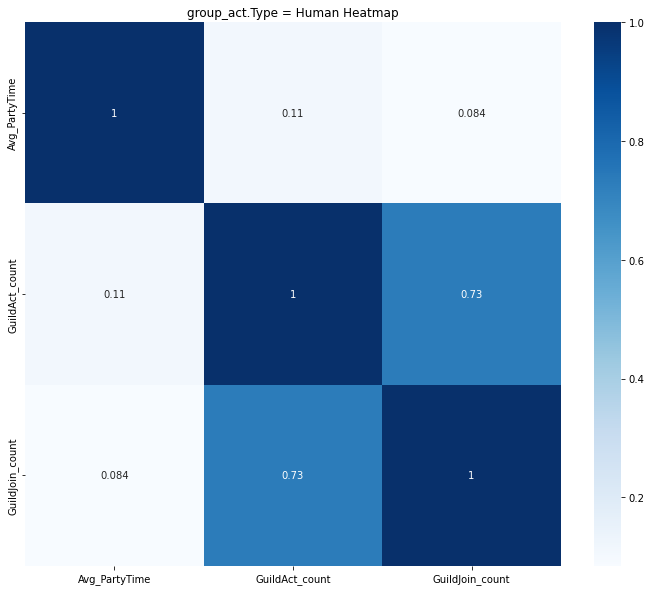

In [51]:
# group_act.Type = Human heatmap
plt.figure(figsize=(12,10))
plt.title("group_act.Type = Human Heatmap")
condition = (group_act.Type == "Human")
group_h_cor = group_act[condition].corr()
sns.heatmap(group_h_cor, annot=True, cmap=plt.cm.Blues)
plt.show()

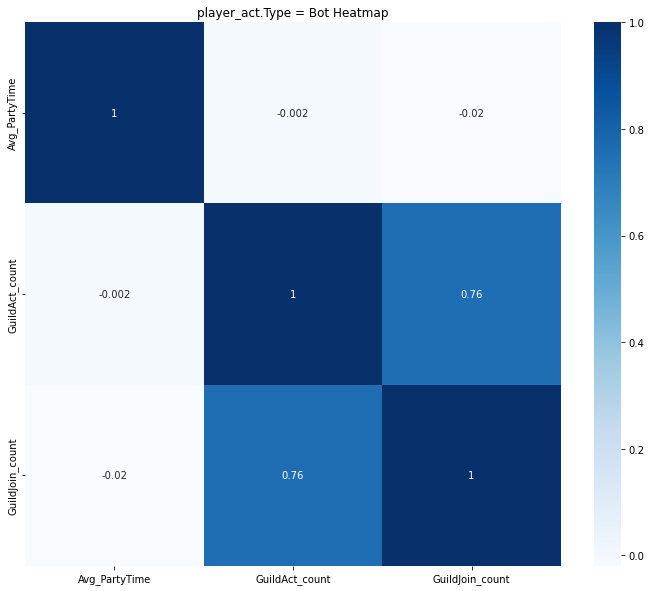

In [52]:
plt.figure(figsize=(12,10))
plt.title("player_act.Type = Bot Heatmap")
condition = (group_act.Type == "Bot")
group_b_cor = group_act[condition].corr()
sns.heatmap(group_b_cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [57]:
# human과 bot 사이 상관계수 차이가 가장 큰 것을 선택
# 상관계수 차이가 크다 = human과 bot의 차이가 될 수 있는 feature이다.
player_diff = abs(player_h_cor - player_b_cor)
player_diff

,collect_max_count,Sit_ratio,Sit_count,sit_count_per_day,Exp_get_ratio,Exp_get_count,exp_get_count_per_day,Item_get_ratio,Item_get_count,item_get_count_per_day,...,Use_portal_count,Use_portal_count_per_day,Killed_bypc_count,Killed_bypc_count_per_day,Killed_bynpc_count,Killed_bynpc_count_per_day,Teleport_count,Teleport_count_per_day,Reborn_count,Reborn_count_per_day
collect_max_count,0.000000,0.157280,0.169138,0.205895,0.371190,0.363079,0.364326,0.114635,0.048494,0.061607,...,0.099911,0.057900,0.184253,0.193547,0.221917,0.142362,0.316924,0.311922,0.060103,0.059946
Sit_ratio,0.157280,0.000000,0.199163,0.298309,0.011774,0.086488,0.087806,0.107403,0.071811,0.114239,...,0.088105,0.118413,0.102605,0.103867,0.199155,0.084368,0.140550,0.042241,0.006613,0.020815
Sit_count,0.169138,0.199163,0.000000,0.097024,0.107884,0.022801,0.223889,0.144778,0.276822,0.099862,...,0.209676,0.139999,0.051597,0.141575,0.154220,0.141901,0.086535,0.224193,0.122341,0.119719
sit_count_per_day,0.205895,0.298309,0.097024,0.000000,0.065097,0.136515,0.314399,0.042296,0.019306,0.184589,...,0.158670,0.134103,0.029698,0.038014,0.075809,0.035488,0.035201,0.039430,0.077004,0.090734
Exp_get_ratio,0.371190,0.011774,0.107884,0.065097,0.000000,0.252566,0.288222,0.058228,0.268498,0.200122,...,0.106937,0.100785,0.039501,0.025356,0.001028,0.180649,0.069035,0.041921,0.115255,0.144942
Exp_get_count,0.363079,0.086488,0.022801,0.136515,0.252566,0.000000,0.177750,0.279804,0.364281,0.032048,...,0.327621,0.194474,0.179544,0.367234,0.289277,0.483751,0.264105,0.544602,0.372012,0.349967
exp_get_count_per_day,0.364326,0.087806,0.223889,0.314399,0.288222,0.177750,0.000000,0.094654,0.007422,0.121678,...,0.204997,0.149738,0.182203,0.188733,0.282251,0.363185,0.220113,0.223825,0.207352,0.225705
Item_get_ratio,0.114635,0.107403,0.144778,0.042296,0.058228,0.279804,0.094654,0.000000,0.204165,0.245286,...,0.013332,0.005261,0.188308,0.203949,0.278747,0.220051,0.261855,0.212368,0.001914,0.015358
Item_get_count,0.048494,0.071811,0.276822,0.019306,0.268498,0.364281,0.007422,0.204165,0.000000,0.330924,...,0.130576,0.084290,0.110572,0.125560,0.138392,0.133505,0.103831,0.219720,0.101861,0.102396
item_get_count_per_day,0.061607,0.114239,0.099862,0.184589,0.200122,0.032048,0.121678,0.245286,0.330924,0.000000,...,0.141413,0.102842,0.067862,0.055075,0.081906,0.075531,0.083642,0.020686,0.087886,0.106618


In [55]:
# group에서는 Human과 Bot 비교되는 특징이 많이 없다. (colmum 수가 적어서 그런 것 같다.)
# player_act에서 Bot의 패턴을 찾아는 것으로 결정.
abs(group_h_cor - group_h_cor)

,Avg_PartyTime,GuildAct_count,GuildJoin_count
Avg_PartyTime,0.0,0.0,0.0
GuildAct_count,0.0,0.0,0.0
GuildJoin_count,0.0,0.0,0.0


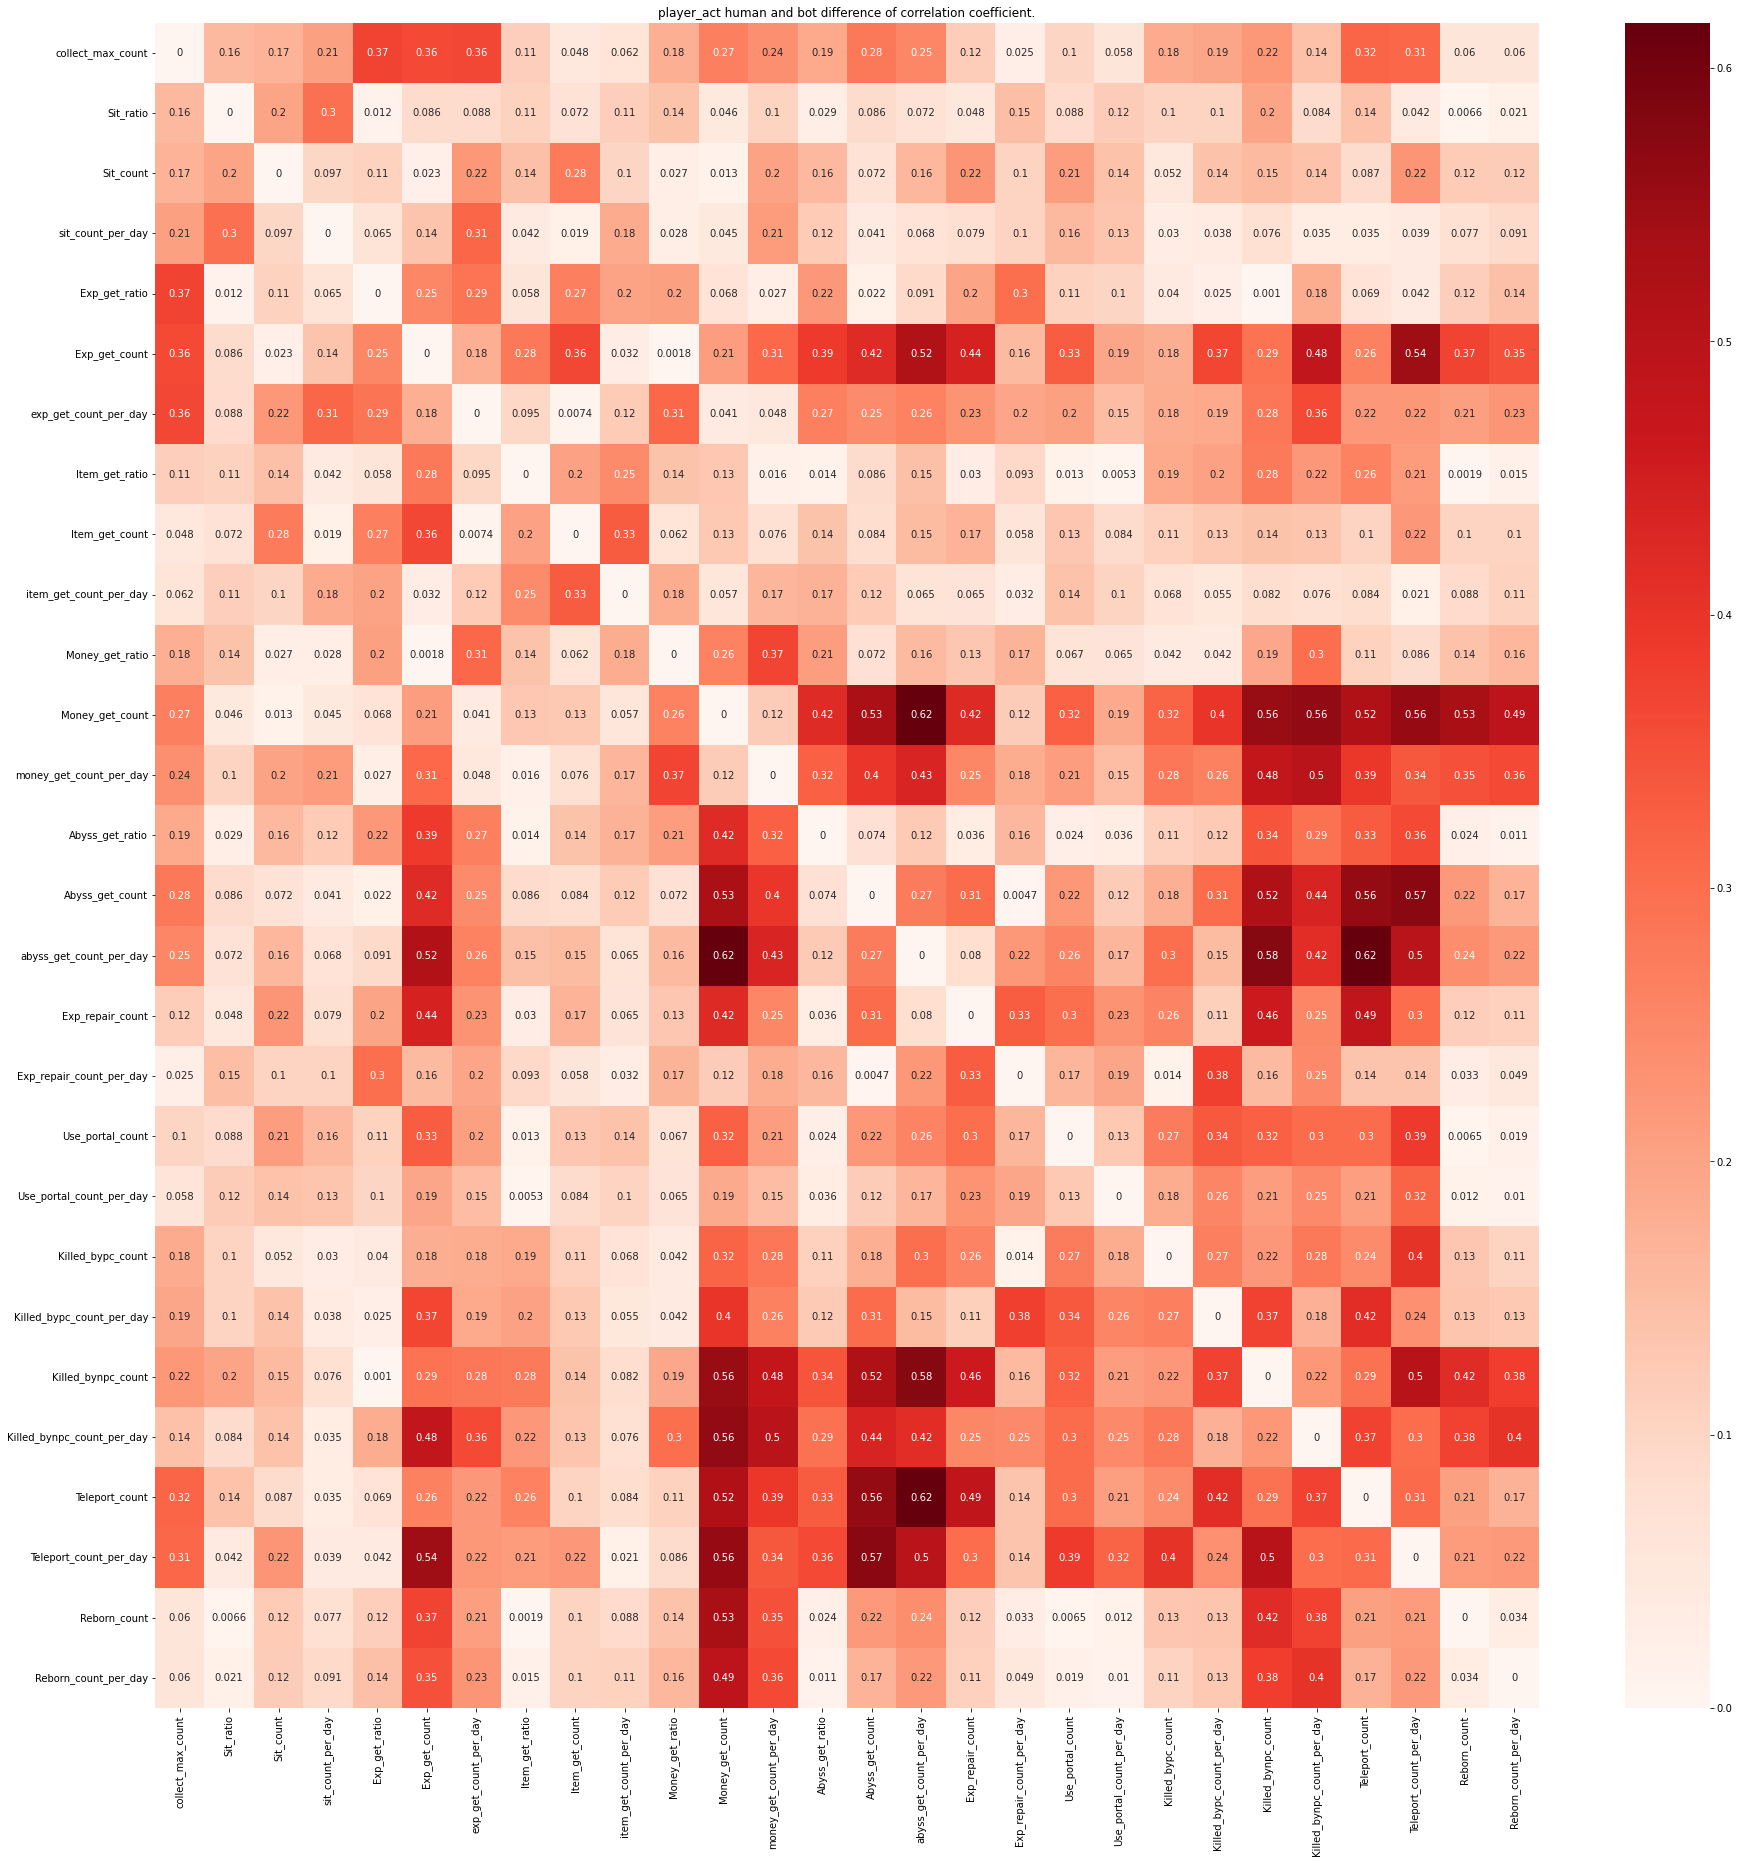

In [71]:
# Human과 Bot의 correlation coefficient 차이 heatmap
plt.figure(figsize=(31,31))
plt.title("player_act human and bot difference of correlation coefficient.")
sns.heatmap(player_diff, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
length = len(player_diff.columns)           # column의 개수
cols = player_diff.columns                  # column 이름

In [86]:
# 상관계수의 차가 0.5 이상인 feature pair 만 골라서 feature_list에 저장
feature_list = []
for i in range(length):
    for j in range(length):
        if player_diff[cols[j]][i] >= 0.5:
            feature_list.append((cols[j], cols[i]))

In [87]:
# feature list를 tuple에서 string list로 만듦
# 중복된 feature 삭제
print(feature_list)
print(len(feature_list))

feature_list = [x[0] for x in feature_list]
feature_list = list(set(feature_list))     # get unique value
feature_list

[('abyss_get_count_per_day', 'Exp_get_count'), ('Teleport_count_per_day', 'Exp_get_count'), ('Abyss_get_count', 'Money_get_count'), ('abyss_get_count_per_day', 'Money_get_count'), ('Killed_bynpc_count', 'Money_get_count'), ('Killed_bynpc_count_per_day', 'Money_get_count'), ('Teleport_count', 'Money_get_count'), ('Teleport_count_per_day', 'Money_get_count'), ('Reborn_count', 'Money_get_count'), ('Money_get_count', 'Abyss_get_count'), ('Killed_bynpc_count', 'Abyss_get_count'), ('Teleport_count', 'Abyss_get_count'), ('Teleport_count_per_day', 'Abyss_get_count'), ('Exp_get_count', 'abyss_get_count_per_day'), ('Money_get_count', 'abyss_get_count_per_day'), ('Killed_bynpc_count', 'abyss_get_count_per_day'), ('Teleport_count', 'abyss_get_count_per_day'), ('Money_get_count', 'Killed_bynpc_count'), ('Abyss_get_count', 'Killed_bynpc_count'), ('abyss_get_count_per_day', 'Killed_bynpc_count'), ('Teleport_count_per_day', 'Killed_bynpc_count'), ('Money_get_count', 'Killed_bynpc_count_per_day'), ('Mo

['abyss_get_count_per_day',
 'Exp_get_count',
 'Reborn_count',
 'Abyss_get_count',
 'Killed_bynpc_count',
 'Teleport_count_per_day',
 'Teleport_count',
 'Killed_bynpc_count_per_day',
 'Money_get_count']

In [94]:
# 선택된 feature의 column만 골라서 데이터셋 구성 (final_dataset.csv)
final_dataset = player_act[feature_list]
final_dataset["Type"] = player_act["Type"]

/var/folders/yb/cn0mspcj4qd062qmh1yvgx5h0000gn/T/ipykernel_6063/2879689668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset["Type"] = player_act["Type"]


In [248]:
# 결측값 확인
final_dataset.isin([np.nan, np.inf, -np.inf]).any(1).sum()

0

In [251]:
# label one-hot encoding

#final_dataset.drop("Type", axis=1)
final_dataset["Type"] = player_act["Type"].map({"Bot": 1, "Human": 0})
final_dataset

/var/folders/yb/cn0mspcj4qd062qmh1yvgx5h0000gn/T/ipykernel_6063/3258164196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset["Type"] = player_act["Type"].map({"Bot": 1, "Human": 0})


,abyss_get_count_per_day,Exp_get_count,Reborn_count,Abyss_get_count,Killed_bynpc_count,Teleport_count_per_day,Teleport_count,Killed_bynpc_count_per_day,Money_get_count,Type
0,255.5952,15060,2,10735,172,25.0238,1051,4.0952,9898,0
1,7.0625,540,0,113,16,7.3750,118,1.0000,299,0
2,0.0000,597,0,0,20,9.2500,37,5.0000,373,0
3,31.4444,625,0,283,6,6.7778,61,0.6667,474,0
4,5.7273,908,0,63,17,4.9091,54,1.5455,468,0
...,...,...,...,...,...,...,...,...,...,...
49734,0.0000,271,0,0,3,15.0000,15,3.0000,206,0
49735,0.0000,384,0,0,2,16.0000,16,2.0000,179,0
49736,0.0000,513,0,0,4,11.0000,11,4.0000,107,0
49737,0.0000,343,0,0,1,10.0000,10,1.0000,136,0


In [253]:
file_name = "final_dataset.csv"
final_dataset.to_csv(data_path+file_name)

final_dataset2.csv
- final_dataset는 선택된 feature의 column을 그대로 가져온
- final_dataset2는 상관계수가 feature의 pair로 이루어진 것을 고려해, 두 feature의 비율로 column을 재구성함.

In [151]:
# 상관계수의 차를 이용한 feature selection
feature_list2 = []
for i in range(length):
    for j in range(length):
        if player_diff[cols[j]][i] >= 0.5:
            feature_list2.append((cols[j], cols[i]))

print("# of of features selected: ", len(feature_list2))

# of of features selected:  30


In [157]:
# 중복 요소 제거 (feature pair)
i = 0
for feature in feature_list2:
    print("find this: ", feature[1], feature[0])
    if (feature[1], feature[0]) in feature_list2:
        print("delete", feature_list2[i])
        del feature_list2[i]
        i += 1
        print()
    else:
        i += 1
        print("no delete")
        print()

print("# of feature rectified: ", len(feature_list2))

find this:  Exp_get_count Teleport_count_per_day
no delete

find this:  Money_get_count abyss_get_count_per_day
no delete

find this:  Money_get_count Killed_bynpc_count_per_day
no delete

find this:  Abyss_get_count Money_get_count
no delete

find this:  Abyss_get_count Teleport_count
no delete

find this:  abyss_get_count_per_day Exp_get_count
no delete

find this:  abyss_get_count_per_day Killed_bynpc_count
no delete

find this:  Killed_bynpc_count Money_get_count
no delete

find this:  Killed_bynpc_count Abyss_get_count
no delete

find this:  Killed_bynpc_count Teleport_count_per_day
no delete

find this:  Teleport_count Money_get_count
no delete

find this:  Teleport_count abyss_get_count_per_day
no delete

find this:  Teleport_count_per_day Money_get_count
no delete

find this:  Teleport_count_per_day Abyss_get_count
no delete

find this:  Reborn_count Money_get_count
no delete

# of feature rectified:  15


In [158]:
# 새로운 컬럼 이름 (ex. "Reborn_count / Money_get_count")
new_columns_name = [feature[0] + "/" + feature[1] for feature in feature_list2]

In [182]:
# 새로운 데이터 프레임 생성
final_dataset2 = pd.DataFrame(columns=new_columns_name)

for i in range(len(feature_list2)):
    final_dataset2[new_columns_name[i]] = player_act[feature_list2[i][0]]/player_act[feature_list2[0][1]]
final_dataset2["Type"] = player_act["Type"]

In [174]:
for i in range(15):
    print(new_columns_name[i])

Teleport_count_per_day/Exp_get_count
abyss_get_count_per_day/Money_get_count
Killed_bynpc_count_per_day/Money_get_count
Money_get_count/Abyss_get_count
Teleport_count/Abyss_get_count
Exp_get_count/abyss_get_count_per_day
Killed_bynpc_count/abyss_get_count_per_day
Money_get_count/Killed_bynpc_count
Abyss_get_count/Killed_bynpc_count
Teleport_count_per_day/Killed_bynpc_count
Money_get_count/Teleport_count
abyss_get_count_per_day/Teleport_count
Money_get_count/Teleport_count_per_day
Abyss_get_count/Teleport_count_per_day
Money_get_count/Reborn_count


In [195]:
# 결측값 확인
import numpy as np
final_dataset2.isin([np.nan, np.inf, -np.inf]).any(1)

,Teleport_count_per_day/Exp_get_count,abyss_get_count_per_day/Money_get_count,Killed_bynpc_count_per_day/Money_get_count,Money_get_count/Abyss_get_count,Teleport_count/Abyss_get_count,Exp_get_count/abyss_get_count_per_day,Killed_bynpc_count/abyss_get_count_per_day,Money_get_count/Killed_bynpc_count,Abyss_get_count/Killed_bynpc_count,Teleport_count_per_day/Killed_bynpc_count,Money_get_count/Teleport_count,abyss_get_count_per_day/Teleport_count,Money_get_count/Teleport_count_per_day,Abyss_get_count/Teleport_count_per_day,Money_get_count/Reborn_count,Type
0,0.001662,0.016972,0.000272,0.657238,0.069788,1.0,0.011421,0.657238,0.712815,0.001662,0.657238,0.016972,0.657238,0.712815,0.657238,Human
1,0.013657,0.013079,0.001852,0.553704,0.218519,1.0,0.029630,0.553704,0.209259,0.013657,0.553704,0.013079,0.553704,0.209259,0.553704,Human
2,0.015494,0.000000,0.008375,0.624791,0.061977,1.0,0.033501,0.624791,0.000000,0.015494,0.624791,0.000000,0.624791,0.000000,0.624791,Human
3,0.010844,0.050311,0.001067,0.758400,0.097600,1.0,0.009600,0.758400,0.452800,0.010844,0.758400,0.050311,0.758400,0.452800,0.758400,Human
4,0.005406,0.006308,0.001702,0.515419,0.059471,1.0,0.018722,0.515419,0.069383,0.005406,0.515419,0.006308,0.515419,0.069383,0.515419,Human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49734,0.055351,0.000000,0.011070,0.760148,0.055351,1.0,0.011070,0.760148,0.000000,0.055351,0.760148,0.000000,0.760148,0.000000,0.760148,Human
49735,0.041667,0.000000,0.005208,0.466146,0.041667,1.0,0.005208,0.466146,0.000000,0.041667,0.466146,0.000000,0.466146,0.000000,0.466146,Human
49736,0.021442,0.000000,0.007797,0.208577,0.021442,1.0,0.007797,0.208577,0.000000,0.021442,0.208577,0.000000,0.208577,0.000000,0.208577,Human
49737,0.029155,0.000000,0.002915,0.396501,0.029155,1.0,0.002915,0.396501,0.000000,0.029155,0.396501,0.000000,0.396501,0.000000,0.396501,Human


In [235]:
# 결측값 확인
final_dataset2.replace([np.inf, -np.inf], np.nan, inplace=True)
final_dataset2[final_dataset2.isin([np.nan, np.inf, -np.inf]).any(1)]
f2_column = final_dataset2.columns

for i in range(len(f2_column)):
    final_dataset2[f2_column[i]].fillna(final_dataset2.quantile(.75)[i], inplace=True)

In [236]:
# 결측값 처리 확인
final_dataset2.isna().sum()

Teleport_count_per_day/Exp_get_count          0
abyss_get_count_per_day/Money_get_count       0
Killed_bynpc_count_per_day/Money_get_count    0
Money_get_count/Abyss_get_count               0
Teleport_count/Abyss_get_count                0
Exp_get_count/abyss_get_count_per_day         0
Killed_bynpc_count/abyss_get_count_per_day    0
Money_get_count/Killed_bynpc_count            0
Abyss_get_count/Killed_bynpc_count            0
Teleport_count_per_day/Killed_bynpc_count     0
Money_get_count/Teleport_count                0
abyss_get_count_per_day/Teleport_count        0
Money_get_count/Teleport_count_per_day        0
Abyss_get_count/Teleport_count_per_day        0
Money_get_count/Reborn_count                  0
Type                                          0
dtype: int64

In [220]:
# 라벨 one-hot encoding
final_dataset2["Type"] = final_dataset2["Type"].map({"Bot": 1, "Human": 0})

ValueError: Input contains infinity or a value too large for dtype('float64').

In [237]:
file_name = "final_dataset2.csv"
final_dataset2.to_csv(data_path+file_name)

In [241]:
f = final_dataset2.drop("Type", axis=1)

In [243]:
f.dtypes

Teleport_count_per_day/Exp_get_count          float64
abyss_get_count_per_day/Money_get_count       float64
Killed_bynpc_count_per_day/Money_get_count    float64
Money_get_count/Abyss_get_count               float64
Teleport_count/Abyss_get_count                float64
Exp_get_count/abyss_get_count_per_day         float64
Killed_bynpc_count/abyss_get_count_per_day    float64
Money_get_count/Killed_bynpc_count            float64
Abyss_get_count/Killed_bynpc_count            float64
Teleport_count_per_day/Killed_bynpc_count     float64
Money_get_count/Teleport_count                float64
abyss_get_count_per_day/Teleport_count        float64
Money_get_count/Teleport_count_per_day        float64
Abyss_get_count/Teleport_count_per_day        float64
Money_get_count/Reborn_count                  float64
dtype: object

In [244]:
final_dataset2.dtypes

Teleport_count_per_day/Exp_get_count          float64
abyss_get_count_per_day/Money_get_count       float64
Killed_bynpc_count_per_day/Money_get_count    float64
Money_get_count/Abyss_get_count               float64
Teleport_count/Abyss_get_count                float64
Exp_get_count/abyss_get_count_per_day         float64
Killed_bynpc_count/abyss_get_count_per_day    float64
Money_get_count/Killed_bynpc_count            float64
Abyss_get_count/Killed_bynpc_count            float64
Teleport_count_per_day/Killed_bynpc_count     float64
Money_get_count/Teleport_count                float64
abyss_get_count_per_day/Teleport_count        float64
Money_get_count/Teleport_count_per_day        float64
Abyss_get_count/Teleport_count_per_day        float64
Money_get_count/Reborn_count                  float64
Type                                            int64
dtype: object

0